# Introdução
Para um sinal definido numa janela de tempo $[0, T]$ segundos, ao calcular sua transformada de Fourier, o intervalo de frequências $\omega$ (em radianos por segundo) que precisa ser considerado abrange todas as frequências possíveis. No entanto, o conceito de intervalo de frequências pode ser entendido de diferentes maneiras dependendo do contexto (tempo contínuo vs tempo discreto).

## 1. Transformada de Fourier Contínua
Se o sinal é contínuo no tempo (ou seja, definido para todos os $t \in [0, T]$), a transformada de Fourier contínua é usada. A transformada de Fourier contínua de um sinal $x(t)$ é dada por:

$$
X(\omega) = \int_{-\infty}^{\infty} x(t) e^{-j\omega t} \, dt
$$

Para um sinal que é zero fora do intervalo $[0, T]$, essa integral se reduz a:

$$
X(\omega) = \int_{0}^{T} x(t) e^{-j\omega t} \, dt
$$

Neste caso, $\omega$ pode assumir qualquer valor real, ou seja, $\omega \in (-\infty, \infty)$.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

**Exemplo**

Considere o sinal $x(t) = e^{-\alpha t}u(t)$. Por ser um sinal contínuo no tempo (i.e., definido $\forall t$), temos:

$$
X(\omega) = \int_{-\infty}^{\infty} e^{-\alpha t}u(t) e^{-j\omega t} \, dt \quad \therefore \quad X(\omega) = \int_{0}^{\infty} e^{-\alpha t} e^{-j\omega t}dt
$$

Calculando a integral acima, obemos:
$$
X(\omega) = \frac{1}{1 + j\omega}
$$

Definindo o sinal no tempo $x(t)$

In [10]:
# Definindo x(t)
def x(t,a): return np.exp(-a*t)

In [3]:
# Simbolos
t, a = sp.symbols('t a')
sp.exp(-a * t)

exp(-a*t)

Definindo função que calcula a $X(\omega)$

In [4]:
# Definindo X(⍵)
def X(w): return 1/(1j*w + 1)

In [5]:
# Simbolos
omega = sp.symbols('omega')
1 / (sp.I * omega + 1)

1/(I*omega + 1)

In [6]:
# Definindo o intervalo de tempo para x(t)
t = np.linspace(0,10,512)

In [21]:
# Definindo o intervalo de frequências para X(⍵)
w = np.linspace(-100,100,512)

Exibindo os gráficos de $x(t)$, $|X(\omega)|$ e $\varphi\{X(\omega)\}$

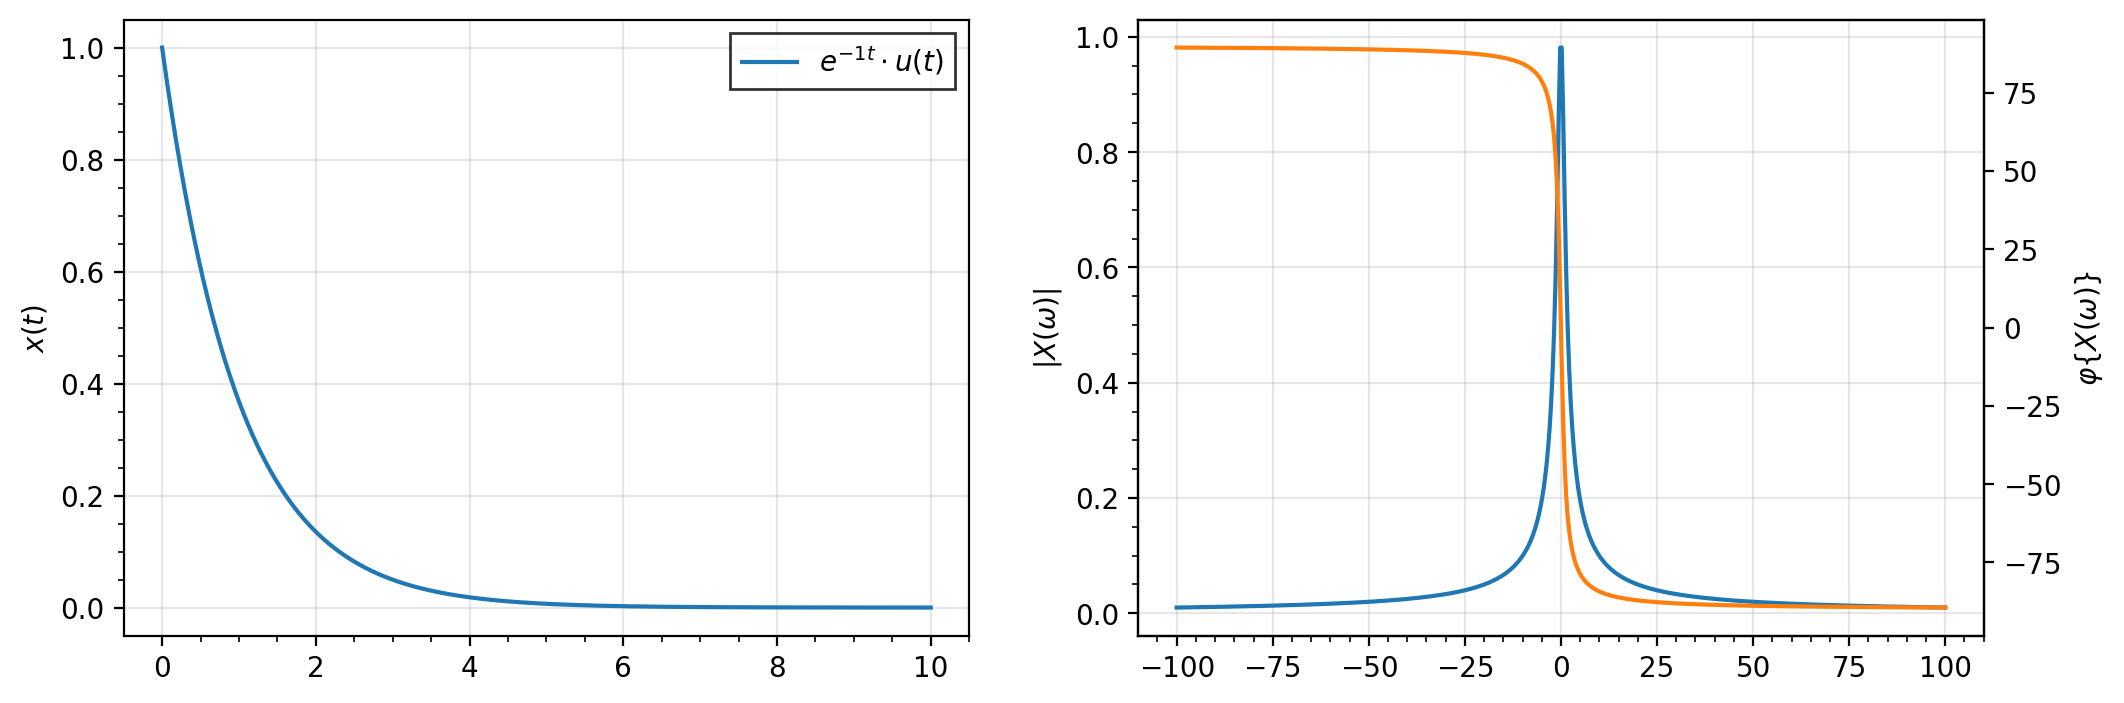

In [22]:
fig, axes = plt.subplots(1,2,figsize=(12,4),dpi=200)

# Sinal no dominio do tempo
a=1
axes[0].plot(t,x(t,a),label=rf'$e^{{-{a} t}}\cdot u(t)$')
axes[0].set_ylabel(f'$x(t)$')
axes[0].legend(fancybox=False, edgecolor='k')
axes[0].minorticks_on()
axes[0].grid(alpha=0.3)
    
# Sinal no dominio da frequência
mag = abs(X(w))
fase = np.arctan(X(w).imag/X(w).real)
axes[1].plot(w,mag)
axes[1].set_ylabel(f'$|X(\omega)|$')
axes[1].minorticks_on()
axes[1].grid(alpha=0.3)          
          
# Criando um segundo eixo y para a fase (ax2)
ax2 = axes[1].twinx()
ax2.plot(w,fase*(180/np.pi),label=r'$\varphi \{X(\omega)\}$',color='tab:orange')
ax2.set_ylabel(r'$\varphi \{X(\omega)\}$')
plt.show()

## 2. Transformada de Fourier Discreta (DFT)
Se o sinal é amostrado e temos $N$ amostras igualmente espaçadas no intervalo $[0, T]$, então a Transformada de Fourier Discreta (DFT) é usada. Supondo uma taxa de amostragem $f_s = \frac{N}{T}$, as frequências discretas $f_k$ em hertz e as correspondentes frequências angulares $\omega_k$ são dadas por:

$$
f_k = \frac{k f_s}{N} = \frac{k}{T}, \quad \text{para } k = 0, 1, 2, \ldots, N-1 \quad \omega_k = 2\pi f_k = \frac{2\pi k}{T}
$$

Os valores de $k$ variam de 0 a $N-1$, então as frequências discretas $\omega_k$ variam de $0$ a $2\pi (N-1)/T$.

No contexto da DFT, geralmente consideramos as frequências no intervalo:

$$
\omega \in \left[0, \frac{2\pi (N-1)}{T}\right]
$$

Ou, se utilizarmos a simetria da DFT e considerarmos as frequências negativas também, o intervalo é:

$$
\omega \in \left[-\pi f_s, \pi f_s\right] = \left[-\pi \frac{N}{T}, \pi \frac{N}{T}\right]
$$

**Exemplo**

Considere o sinal $x[n] = e^{-\alpha t}u[n]$. Por ser um sinal discreto no tempo (i.e., definido $\forall t\in \mathbb{N}$), temos:

$$
X[k] = \sum_{n=0}^{N-1} e^{-\alpha n} \text{exp}\left({\frac{-2j\pi k}{T}n}\right)
$$

Calculando a integral acima, obemos:
$$
X(\omega) = \frac{1}{1 + j\omega}
$$

Em resumo, o intervalo de frequências $\omega$ a ser considerado depende se estamos tratando de um sinal contínuo ou amostrado:

- **Para sinais contínuos**: $\omega \in (-\infty, \infty)$.
- **Para sinais amostrados**: $\omega \in \left[-\pi f_s, \pi f_s\right]$, onde $f_s = \frac{N}{T}$.